In [63]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [64]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Sets/Telcom Data.csv')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [65]:
df.duplicated().sum()

0

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [67]:
pd.concat([df.dtypes.rename('Data Types'),df.isnull().sum().rename('Null'),df.head(5).T],axis=1)

,Data Types,Null,0,1,2,3,4
customerID,object,0,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,object,0,Female,Male,Male,Male,Female
SeniorCitizen,int64,0,0,0,0,0,0
Partner,object,0,Yes,No,No,No,No
Dependents,object,0,No,No,No,No,No
tenure,int64,0,1,34,2,45,2
PhoneService,object,0,No,Yes,Yes,No,Yes
MultipleLines,object,0,No phone service,No,No,No phone service,No
InternetService,object,0,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,object,0,No,Yes,Yes,Yes,No


## Here 'TotalCharges' are ini Numerical but actually it is in Object

In [68]:
pd.to_numeric(df["TotalCharges"], errors="raise") .head()

ValueError: Unable to parse string " " at position 488

In [69]:
print(df['TotalCharges'].unique()[487:489])

['114.15' '139.4']


In [70]:
df["TotalCharges"]=df["TotalCharges"].replace({" ":np.nan})

In [71]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='raise')

In [72]:
df['TotalCharges'].dtypes

dtype('float64')

## EDA

In [73]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [74]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


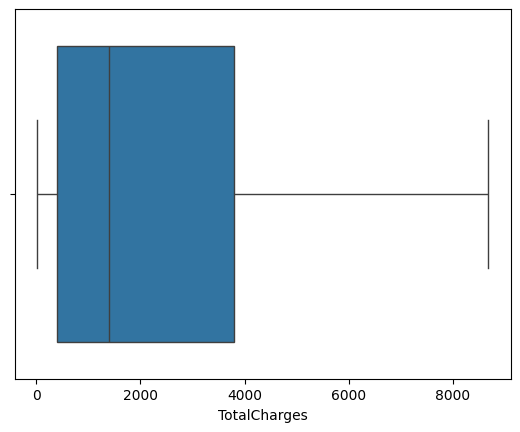

In [75]:
sns.boxplot(df,x = 'TotalCharges')
plt.show()

In [76]:
# the TotalCharges data is right skewed we fill null values with median

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [77]:
# No null values

df.isnull().sum().sum()

0

In [78]:
df = df.drop(['customerID'],axis=1)

In [79]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [80]:

for i in df.columns:
  if df[i].dtypes == 'object':
    print()
    print('*'*30,i,'*'*30)
    print()
    print(df[i].nunique())
    print(df[i].unique())


****************************** gender ******************************

2
['Female' 'Male']

****************************** Partner ******************************

2
['Yes' 'No']

****************************** Dependents ******************************

2
['No' 'Yes']

****************************** PhoneService ******************************

2
['No' 'Yes']

****************************** MultipleLines ******************************

3
['No phone service' 'No' 'Yes']

****************************** InternetService ******************************

3
['DSL' 'Fiber optic' 'No']

****************************** OnlineSecurity ******************************

3
['No' 'Yes' 'No internet service']

****************************** OnlineBackup ******************************

3
['Yes' 'No' 'No internet service']

****************************** DeviceProtection ******************************

3
['No' 'Yes' 'No internet service']

****************************** TechSupport ***************************

## Analysing how they effect on Target Variable

In [81]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


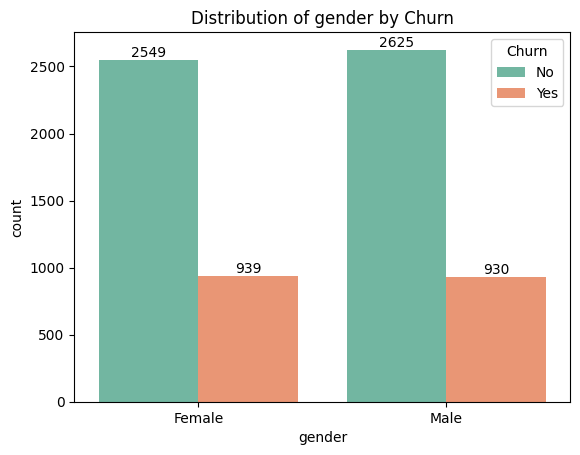

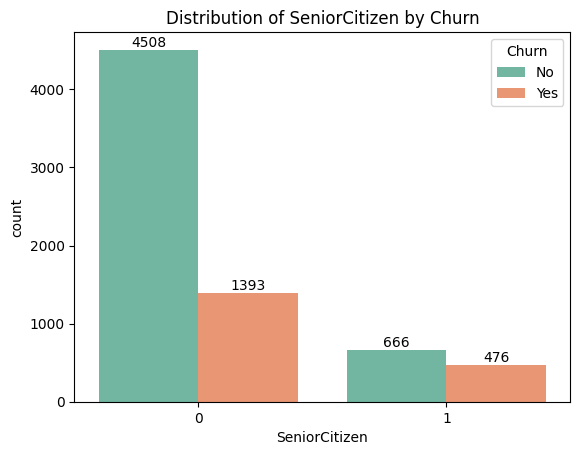

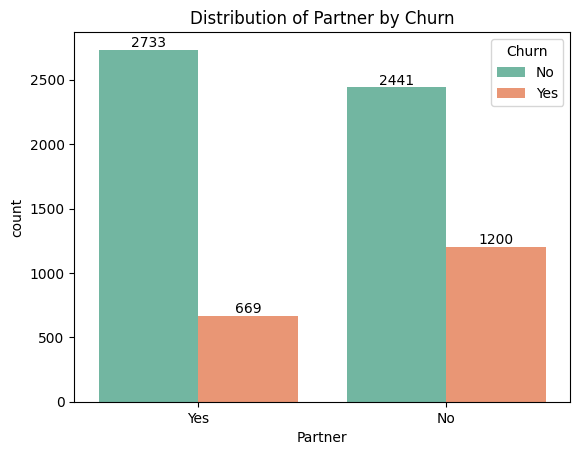

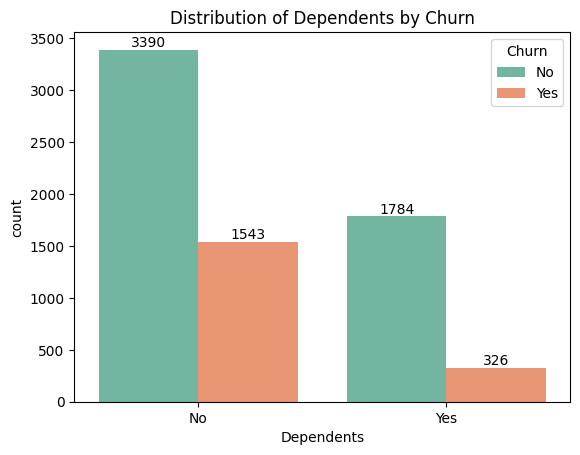

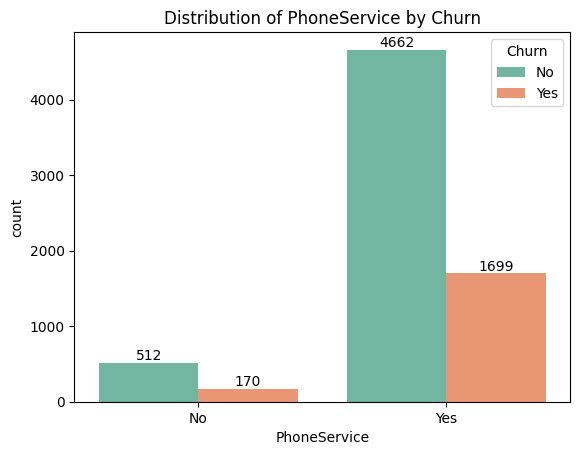

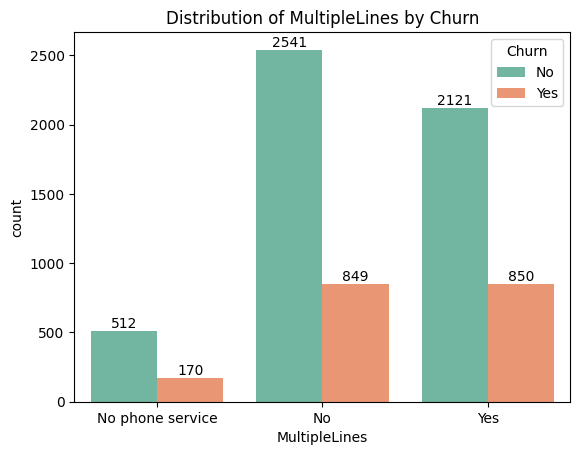

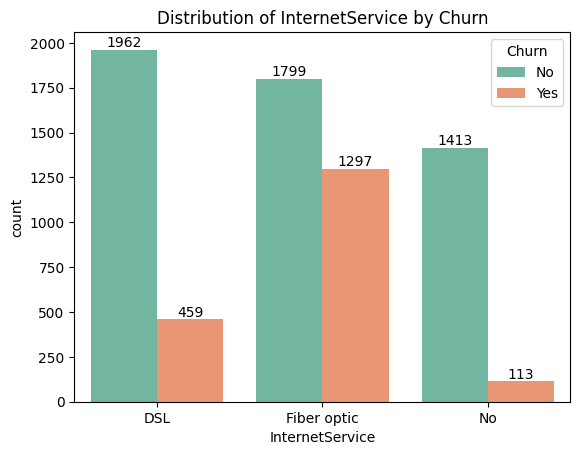

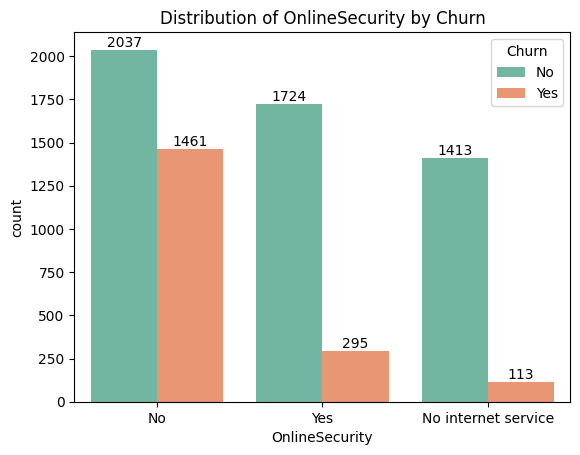

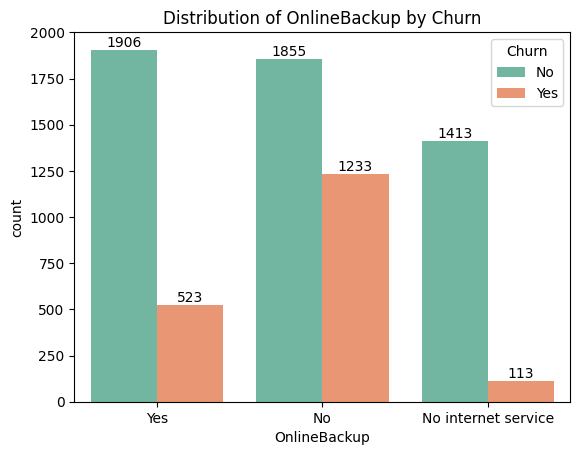

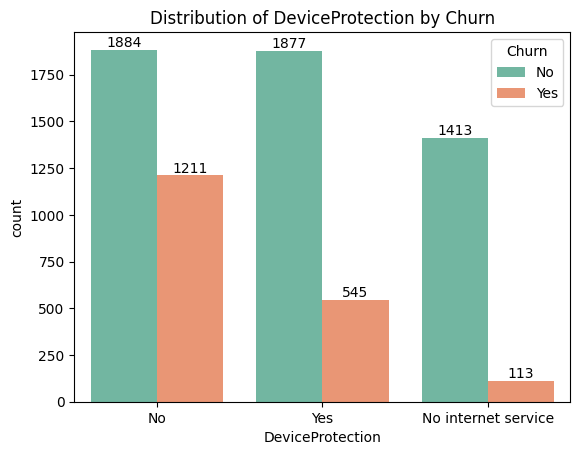

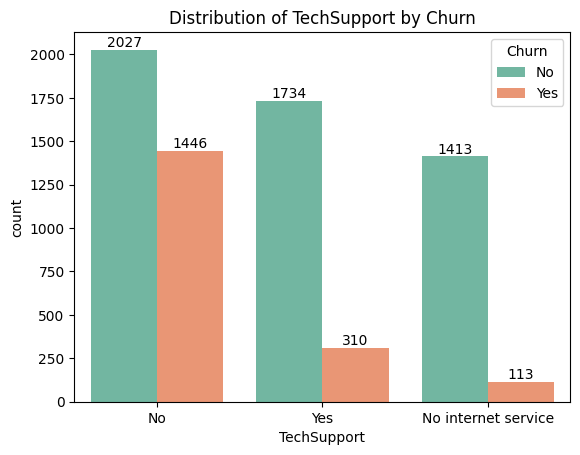

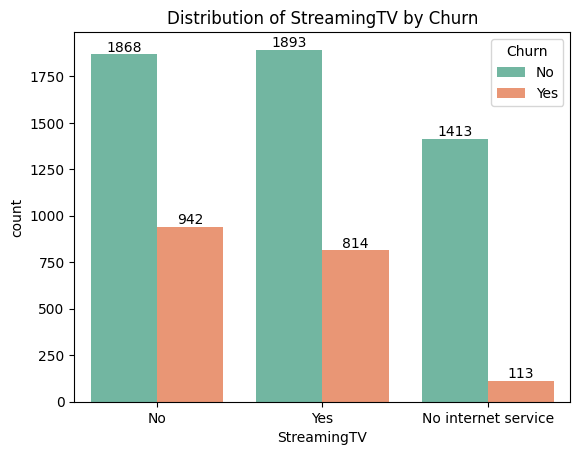

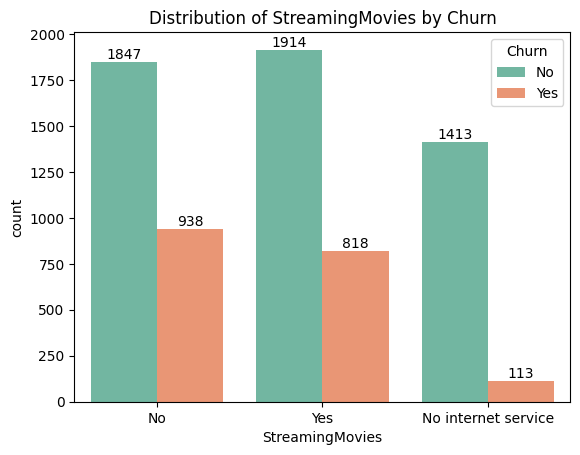

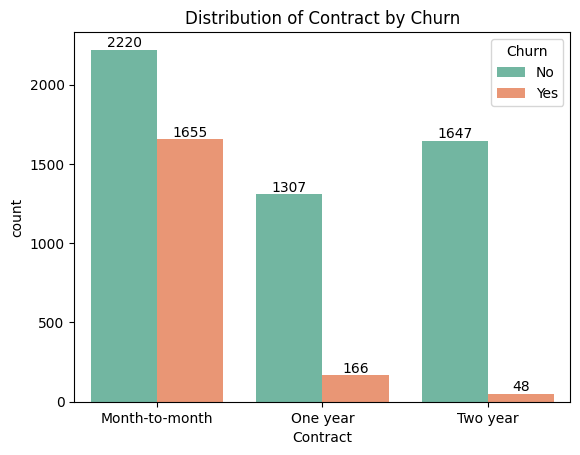

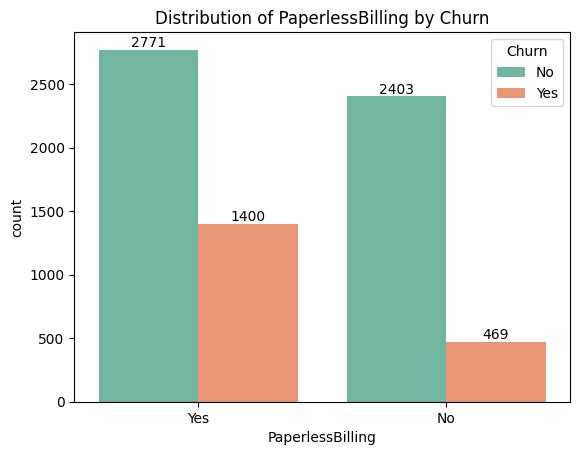

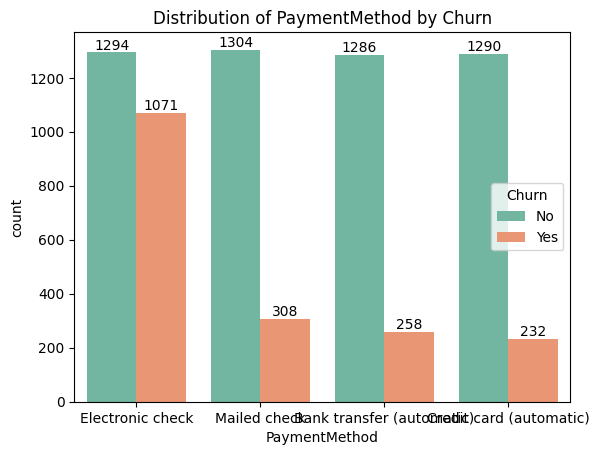

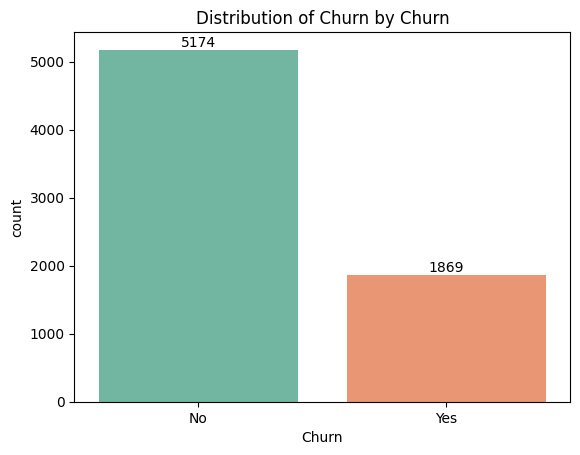

In [82]:

# for categorical column
for cols in df.columns:
  if df[cols].dtypes == 'object' or cols == 'SeniorCitizen':
    ax = sns.countplot(data=df, x=cols, hue='Churn', palette="Set2")
    for container in ax.containers:
      ax.bar_label(container)

    plt.title(f"Distribution of {cols} by Churn")
    plt.show()

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


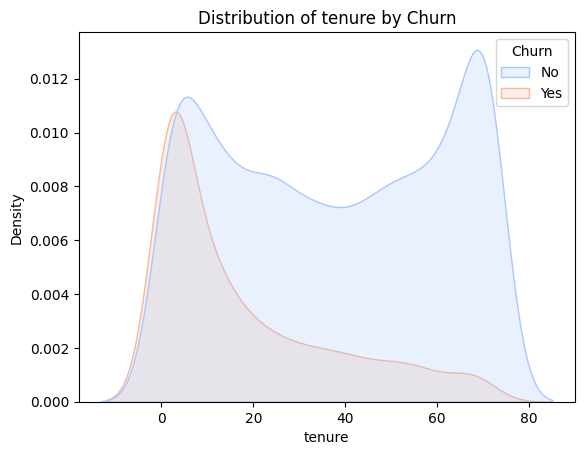

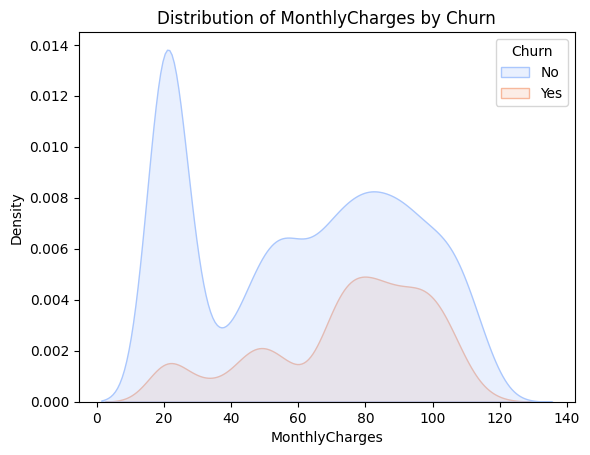

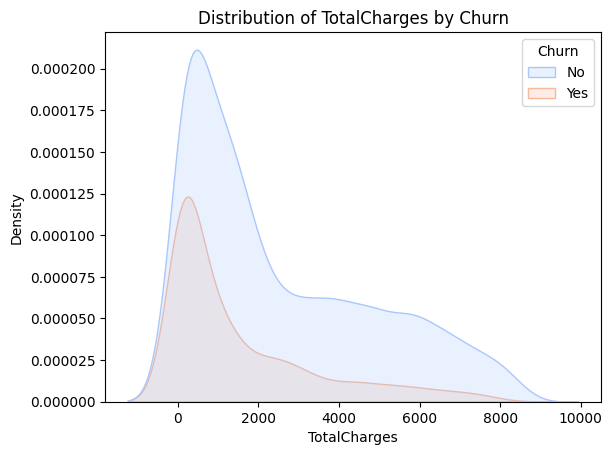

In [84]:
# for numerical column
for cols in df.columns:
  if df[cols].dtypes in ['int64','float64'] and cols != 'SeniorCitizen':
    ax = sns.kdeplot(data=df, x=cols, hue='Churn',fill=True, palette= 'coolwarm' )
    plt.title(f"Distribution of {cols} by Churn")
    plt.xlabel(cols)
    plt.ylabel("Density")
    plt.xticks(rotation=0)
    plt.show()

# Data Preprocessing
import required Libraries

In [85]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [86]:
df_en =pd.DataFrame()
df_sc =pd.DataFrame()
for i in df.columns:
  if df[i].dtype == 'object':
    df_en[i] = df[i]
  else:
    df_sc[i] = df[i]

In [87]:
df_en.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [88]:
df_sc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [89]:
df_en = pd.get_dummies(df_en,drop_first= True)

In [90]:
df_en = df_en.applymap(lambda x:1 if x==True else 0)

In [91]:
df_en.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


# Scaling

In [92]:
scaler = MinMaxScaler()
df_sc=pd.DataFrame(scaler.fit_transform(df_sc),columns=df_sc.columns)


In [93]:
df_sc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,0.013889,0.115423,0.001275
1,0.0,0.472222,0.385075,0.215867
2,0.0,0.027778,0.354229,0.010310
3,0.0,0.625000,0.239303,0.210241
4,0.0,0.027778,0.521891,0.015330


In [94]:
df_new = pd.concat([df_en,df_sc],axis =1)

In [95]:
df_new.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,0.013889,0.115423,0.001275
1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0.0,0.472222,0.385075,0.215867
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0.0,0.027778,0.354229,0.010310
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0.0,0.625000,0.239303,0.210241
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0.0,0.027778,0.521891,0.015330


# Spliting the Data Into Trainin & Testing

In [96]:
x = df_new.drop(['Churn_Yes'],axis =1)
y = df_new['Churn_Yes']

In [97]:
df_new['Churn_Yes'].value_counts()

,count
Churn_Yes,
0,5174
1,1869


# Since the target variable is imbalnce soo we are using Stratify

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [99]:
for i in [x_train,x_test,y_train,y_test]:
  print(i.shape)


(5634, 30)
(1409, 30)
(5634,)
(1409,)


##Building Maching Learning (Traditional Algorithm)
Importing Required Libralies

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,ConfusionMatrixDisplay

In [101]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
]

In [102]:
scores = {}
for model in models:
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    train_accuracy = round(accuracy_score(y_train, y_train_pred)*100,2)
    test_accuracy = round(accuracy_score(y_test, y_test_pred)*100,2)
    scores[type(model).__name__] = {"Train Accuracy": train_accuracy, "Test Accuracy": test_accuracy}


In [103]:
accuracy_table = pd.DataFrame.from_dict(scores, orient= 'index').reset_index()
accuracy_table.rename(columns={'index':'Models'},inplace=True)

In [104]:
accuracy_table

,Models,Train Accuracy,Test Accuracy
0,LogisticRegression,80.42,79.84
1,DecisionTreeClassifier,99.80,74.31
2,RandomForestClassifier,99.80,78.78
3,XGBClassifier,93.88,78.14
4,KNeighborsClassifier,83.49,74.80
5,SVC,82.06,78.92
6,GaussianNB,66.54,65.58


#  The best accuracy score is LogesLogisticRegression

In [105]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print("Training Score",round(accuracy_score(y_train, y_train_pred)*100,2))
print("Testing Score",round(accuracy_score(y_test, y_test_pred)*100,2))

Training Score 80.42
Testing Score 79.84


# Cross Validation

In [107]:
cvs=cross_val_score(model,x_train,y_train,cv=10)
print("Training Mean",round(cvs.mean()*100,2))

Training Mean 80.23


In [108]:
cvs

array([0.84219858, 0.80673759, 0.80673759, 0.78900709, 0.80817052,
       0.80461812, 0.78685613, 0.79040853, 0.79928952, 0.78863233])

# Confusion matrix Display

Classification Report
:               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



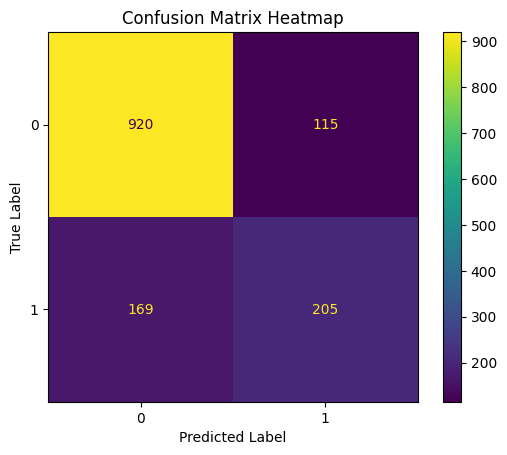

In [111]:
cm = ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,display_labels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
print('Classification Report\n:', classification_report(y_test,y_test_pred))